# 확률적 경사 하강법

## SGDClassifier

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42) 

In [6]:
# 표준화 전처리작업, 반드시 테스트 세트도 변환해야한다.

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [8]:
# loss='log'로 지정하여 로지스틱 손실함수를 지정
# max_iter는 수행할 에포크 횟수, 10으로 지정하여 전체 훈련 세트를 10회 반복하겠다.
# 그다음 훈련세트와 테스트세트에서 정확도 점수를 출력한다.

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = "log", max_iter = 10, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 정확도가 상당히 낮다. 지정한 반복횟수 10번이 부족한것으로 보인다.

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [9]:
# 점진적 학습을 해보자
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


## 에포크와 과대 과소적합

In [11]:
import numpy as np

sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []

classes = np.unique(train_target)

In [12]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

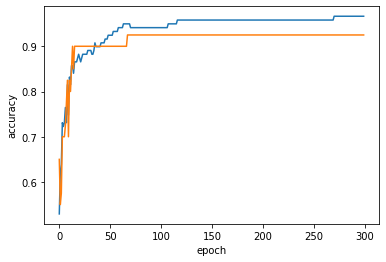

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [17]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
